In [28]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [29]:
a = fits.open(glob('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4911/*.fits')[0])

In [30]:
a[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD-2457000, days'
    name = 'CADENCENO'; format = 'J'
    name = 'SAP_FLUX'; format = 'E'
    name = 'KSPSAP_FLUX'; format = 'E'
    name = 'KSPSAP_FLUX_ERR'; format = 'E'
    name = 'QUALITY'; format = 'J'
    name = 'ORBITID'; format = 'J'
    name = 'SAP_X'; format = 'E'; unit = 'pixel'
    name = 'SAP_Y'; format = 'E'; unit = 'pixel'
    name = 'SAP_BKG'; format = 'E'
    name = 'SAP_BKG_ERR'; format = 'E'
    name = 'KSPSAP_FLUX_SML'; format = 'E'
    name = 'KSPSAP_FLUX_LAG'; format = 'E'
)

In [31]:
a[1].data['CADENCENO']

array([25787, 25788, 25789, ..., 26984, 26985, 26986], dtype=int32)

In [32]:
print(a[1].data['SAP_FLUX'], a[1].data['KSPSAP_FLUX'])

[1.000109  1.0008879 1.0037633 ... 1.0435084 1.0417938 1.0018946] [0.99797213 0.9985982  1.001329   ... 0.96822524 0.9651142  0.9266731 ]


In [33]:
a[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    1 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
ORIGIN  = 'MIT/QLP '           / institution responsible for creating this file 
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer'    / detector type                                  
FILTER  = 'TESS    '           / the filter used for the observations           
OBJECT  = 'TIC 5614911'        / string version of TICID                        
TICID   =              5614911 / unique TESS target identifier                  
SECTOR  =                   

In [34]:
from astropy.table import Table
dat = Table.read(a)
df = dat.to_pandas()

In [35]:
df

,TIME,CADENCENO,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
0,1764.703539,25787,1.000109,0.997972,0.002528,4096,41,2001.945923,849.212952,3.770000,405.429993,0.999841,0.998001
1,1764.724373,25788,1.000888,0.998598,0.002528,4096,41,2001.947021,849.207153,62.689999,503.720001,1.000233,0.997932
2,1764.745207,25789,1.003763,1.001329,0.002528,4096,41,2001.948242,849.207886,2.450000,483.859985,1.000199,1.002519
3,1764.766041,25790,1.002448,0.999890,0.002528,4096,41,2001.948853,849.205444,-60.500000,471.500000,0.999827,1.000582
4,1764.786876,25791,1.005268,1.002589,0.002528,4096,41,2001.951294,849.206055,62.400002,426.670013,1.002611,1.000720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1789.599799,26982,NaN,NaN,0.002528,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1126,1789.620632,26983,NaN,NaN,0.002528,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1127,1789.641466,26984,1.043508,0.968225,0.002528,4096,42,2002.055054,848.884766,14920.709961,8154.029785,1.000074,0.918272
1128,1789.662299,26985,1.041794,0.965114,0.002528,4096,42,2002.055054,848.875000,6843.319824,6553.149902,1.005081,0.904472


In [36]:
"""
From here is the actual attempt at PCA
"""

'\nFrom here is the actual attempt at PCA\n'

In [37]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
# Create a dataset of all the lightcurves in s0017/0000/0000/0561
sample = []
labels = []
for path in glob('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/*/*.fits'):
    print(path)
    fits_file = fits.open(path)
    sample.append(fits_file[1].data['SAP_FLUX'])
    labels.append(fits_file[0].header['OBJECT'])


/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5261/hlsp_qlp_tess_ffi_s0017-0000000005615261_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4864/hlsp_qlp_tess_ffi_s0017-0000000005614864_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4557/hlsp_qlp_tess_ffi_s0017-0000000005614557_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4201/hlsp_qlp_tess_ffi_s0017-0000000005614201_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5021/hlsp_qlp_tess_ffi_s0017-0000000005615021_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4382/hlsp_qlp_tess_ffi_s0017-0000000005614382_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4777/hlsp_qlp_tess_ffi_s0017-0000000005614777_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4986/hlsp_qlp_tess_ffi_s0017-0000000005614986_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4670/hlsp_q

/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4916/hlsp_qlp_tess_ffi_s0017-0000000005614916_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4286/hlsp_qlp_tess_ffi_s0017-0000000005614286_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4590/hlsp_qlp_tess_ffi_s0017-0000000005614590_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4132/hlsp_qlp_tess_ffi_s0017-0000000005614132_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4312/hlsp_qlp_tess_ffi_s0017-0000000005614312_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4635/hlsp_qlp_tess_ffi_s0017-0000000005614635_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5165/hlsp_qlp_tess_ffi_s0017-0000000005615165_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4421/hlsp_qlp_tess_ffi_s0017-0000000005614421_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5043/hlsp_q

sample

In [40]:
sample

[array([0.9992868, 0.9996567, 0.9989093, ..., 1.0248593, 1.020782 ,
        1.0145972], dtype=float32),
 array([1.0015326, 1.001331 , 1.0009866, ..., 1.0153021, 1.0192069,
        1.0160922], dtype=float32),
 array([0.99580944, 0.99946463, 1.0032929 , ..., 1.5475637 , 1.628972  ,
        1.4854399 ], dtype=float32),
 array([0.9994509 , 1.0009161 , 1.0012814 , ..., 1.0007656 , 1.000232  ,
        0.99923414], dtype=float32),
 array([0.99692273, 0.99764466, 0.99922436, ..., 1.6216929 , 1.474438  ,
        1.3225752 ], dtype=float32),
 array([1.0017685 , 1.0016477 , 1.0019066 , ..., 1.0019876 , 0.99978215,
        1.0017595 ], dtype=float32),
 array([1.0001864 , 0.998861  , 0.996804  , ..., 0.9482295 , 0.96141154,
        0.9649173 ], dtype=float32),
 array([1.0003786, 1.0007437, 1.0014327, ..., 1.0095588, 1.005047 ,
        1.0015595], dtype=float32),
 array([1.0045041 , 1.0006659 , 0.9980202 , ..., 0.92420906, 0.9264111 ,
        0.95906425], dtype=float32),
 array([1.0016078, 1.0002853

In [41]:
pca = PCA(n_components=2)
sample_after_pca = pca.fit(sample).transform(sample)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_sample = imp_mean.fit_transform(sample)

In [43]:
imputed_sample

array([[0.99928677, 0.99965668, 0.99890929, ..., 1.02485931, 1.02078199,
        1.01459718],
       [1.00153255, 1.00133097, 1.00098658, ..., 1.01530206, 1.01920688,
        1.01609218],
       [0.99580944, 0.99946463, 1.00329292, ..., 1.54756367, 1.62897205,
        1.4854399 ],
       ...,
       [1.0025425 , 1.00298524, 1.00211084, ..., 1.00200963, 1.00059104,
        0.9987067 ],
       [0.99982584, 1.00188255, 1.00251782, ..., 0.94971335, 0.94618142,
        0.9250294 ],
       [0.99839222, 0.99879777, 0.99897349, ..., 1.18909669, 1.12675261,
        1.08832705]])

In [44]:
pca = PCA(n_components=2)
sample_after_pca = pca.fit(imputed_sample).transform(imputed_sample)
sample_after_pca

array([[-4.27503451e+01,  3.51499293e-02],
       [-4.27550321e+01, -4.10200741e+01],
       [-3.55102368e+01, -4.03844352e-01],
       [-3.58870501e-01,  4.75851851e-02],
       [-3.84387418e+01, -8.40241666e-01],
       [-4.48444874e+01,  8.38052465e-02],
       [-4.17626519e+01, -9.97874551e-02],
       [-4.40905341e+01,  6.16762735e-02],
       [-3.85352722e+01, -4.15349573e-02],
       [-4.00826976e+01,  2.78700912e-04],
       [-3.60067496e+01,  5.45729607e-03],
       [-3.96792917e+01,  5.65650487e-04],
       [-3.58936525e+01, -7.70876413e-02],
       [ 4.53975900e-02,  2.26303498e-01],
       [-3.65748416e+01,  4.53061324e-01],
       [-1.27009055e-01, -2.15806509e+01],
       [-2.58118718e-01,  3.20818920e-01],
       [-2.73027075e-01,  8.60783371e-02],
       [-1.07024052e-01,  2.24844885e-01],
       [-3.83962359e+01, -1.52581589e-01],
       [-3.10186434e+01,  4.34129520e-01],
       [-4.08980757e+01, -1.11476203e+01],
       [-2.08058253e-01,  2.70723089e-01],
       [-4.

<IPython.core.display.Javascript object>


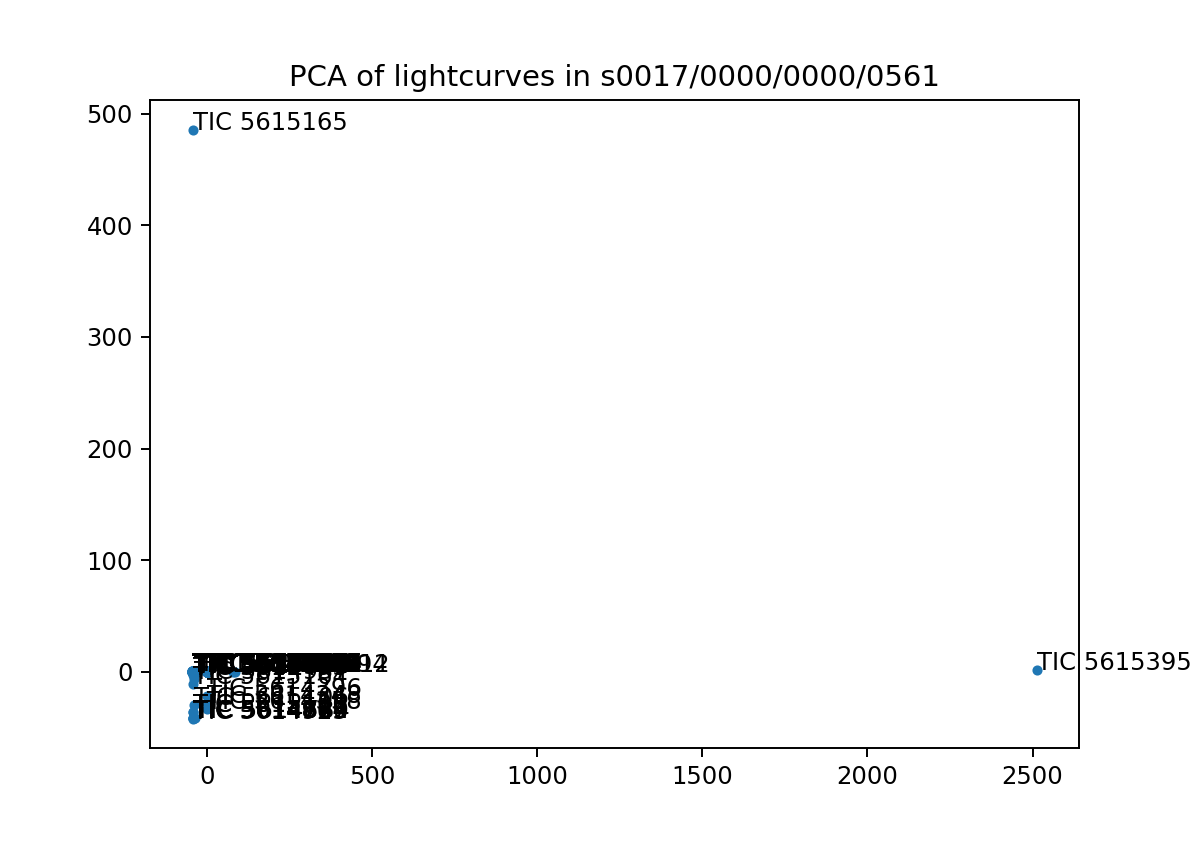

Text(0.5, 1.0, 'PCA of lightcurves in s0017/0000/0000/0561')

In [47]:
%matplotlib notebook

plt.scatter(
    sample_after_pca[:, 0], sample_after_pca[:, 1], s=10, label=labels
)

for i, txt in enumerate(labels):
    plt.annotate(txt, (sample_after_pca[i, 0], sample_after_pca[i, 1]))

plt.title("PCA of lightcurves in s0017/0000/0000/0561")
# plt.imshow(sample_after_pca)
# plt.show()

In [48]:
right_outlier = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5395/hlsp_qlp_tess_ffi_s0017-0000000005615395_tess_v01_llc.fits')
dat = Table.read(right_outlier)
dat.to_pandas()

,TIME,CADENCENO,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
0,1764.703488,25787,0.993515,0.975339,0.009337,4096,41,2084.590088,1128.899170,746.169983,1252.390015,0.985553,9.661676e-01
1,1764.724322,25788,1.032666,1.014915,0.009337,4096,41,2084.586914,1128.888794,1573.530029,1196.239990,1.007614,1.020390e+00
2,1764.745156,25789,1.028881,1.012275,0.009337,4096,41,2084.588379,1128.888672,1352.689941,1179.310059,1.007703,1.016984e+00
3,1764.765991,25790,1.023372,1.007875,0.009337,4096,41,2084.586914,1128.884521,1739.280029,1223.969971,1.004773,1.008938e+00
4,1764.786825,25791,1.015991,1.001562,0.009337,4096,41,2084.590820,1128.886963,486.980011,918.859985,0.999526,1.002613e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1789.599769,26982,NaN,NaN,0.009337,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1126,1789.620603,26983,NaN,NaN,0.009337,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1127,1789.641436,26984,0.909167,0.026822,0.009337,4096,42,2084.769775,1128.755737,236220.265625,193093.375000,0.001265,1.659818e-13
1128,1789.662270,26985,0.946722,0.999034,0.009337,4096,42,2084.744873,1128.734985,183212.515625,141824.703125,0.000916,2.920755e-14
